https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
import re, string, nltk
from scipy.sparse import vstack
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score
from sklearn.decomposition import PCA, TruncatedSVD, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

In [4]:
def generate_wordcloud(data, target, var, threshold = 0):
    target['binary class'] = pd.DataFrame(np.where(target[var] > threshold, 1, 0))
    temp = target[target['binary class']==1].index.values
    temp = data[temp]

    text = []
    for row in temp:
        text.append(' '.join([token.lower() for token in row.split()]))
    text = ' '.join(text)

    stopwords = nltk.corpus.stopwords.words('english')
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white',  stopwords = stopwords, 
                    min_font_size = 10).generate(text) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8,8),facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.savefig('{}.jpg'.format(var))
    plt.show() 

In [5]:
pd.set_option('display.max_columns', 50)

## Load Data

In [6]:
df = pd.read_csv('toxicity/train.csv')[['comment_text','target','severe_toxicity','obscene','identity_attack','insult','threat']]

## Data Exploration

In [7]:
print(df.shape)
df.head(2)

(1804874, 7)


,comment_text,target,severe_toxicity,obscene,identity_attack,insult,threat
0,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,0.0
1,Thank you!! This would make my life a lot less...,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.describe()

,target,severe_toxicity,obscene,identity_attack,insult,threat
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,1.030173e-01,4.582099e-03,1.387721e-02,2.263571e-02,8.115273e-02,9.311271e-03
std,1.970757e-01,2.286128e-02,6.460419e-02,7.873156e-02,1.760657e-01,4.942218e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
data = df['comment_text'].values
target = pd.DataFrame(df['target'].copy())

In [34]:
target['binary class'] = pd.DataFrame(np.where(target['target'] > 0.5, 1, 0))

In [35]:
target['binary class'].value_counts()

0    1698436
1     106438
Name: binary class, dtype: int64

In [36]:
1698436/target.shape[0], 106438/target.shape[0]

(0.9410274623048479, 0.05897253769515213)

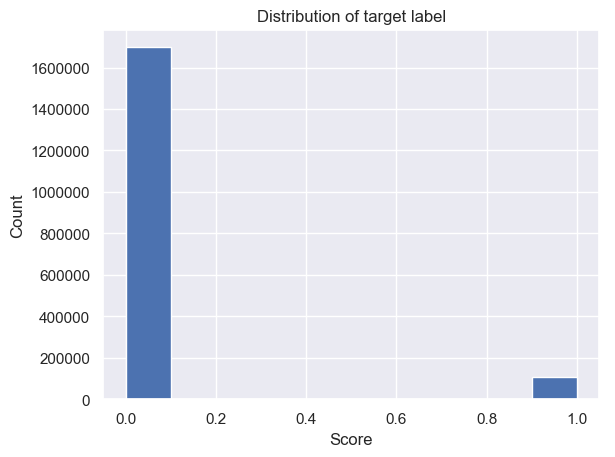

In [93]:
target['binary class'].hist()
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of target label')
plt.savefig('hist.jpg')

# Wordcloud

#### Target > 0.5

In [62]:
target = pd.DataFrame(df['target'].copy())
temp = pd.DataFrame(np.where(target['target'] > 0.5, 1, 0))
temp[0].value_counts()

0    1698436
1     106438
Name: 0, dtype: int64

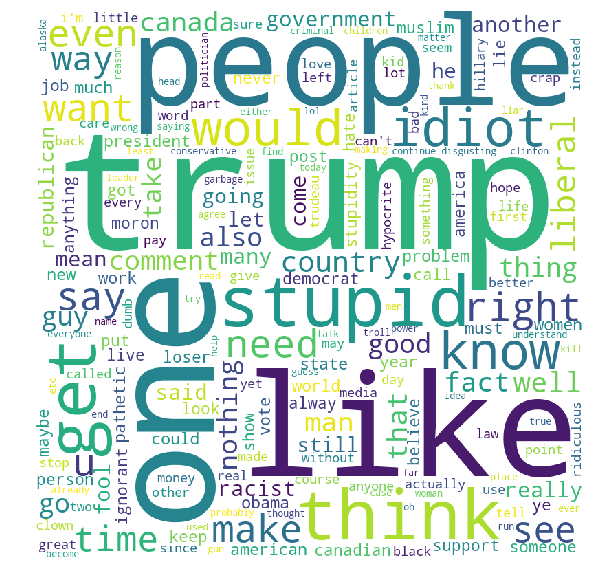

In [63]:
target['binary class'] = pd.DataFrame(np.where(target['target'] > 0.5, 1, 0))
temp = target[target['binary class']==1].index.values
temp = data[temp]

text = []
for row in temp:
    text.append(' '.join([token.lower() for token in row.split()]))
text = ' '.join(text)

stopwords = nltk.corpus.stopwords.words('english')
wordcloud = WordCloud(width = 800, height = 800, background_color ='white',  stopwords = stopwords, 
                min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8,8),facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.savefig('neg.jpg')
plt.show() 

#### Target > 0.8

In [62]:
target = pd.DataFrame(df['target'].copy())
temp = pd.DataFrame(np.where(target['target'] > 0.8, 1, 0))
temp[0].value_counts()

0    1781072
1      23802
Name: 0, dtype: int64

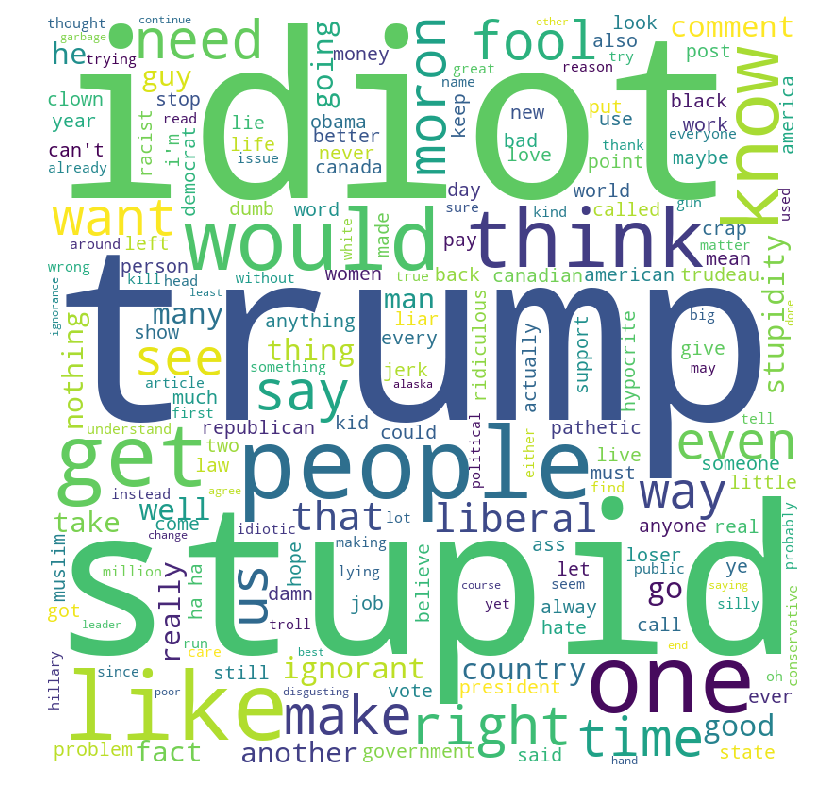

In [63]:
generate_wordcloud(data, target, 'target', threshold = 0.8)

#### Severe toxicity

In [64]:
target = pd.DataFrame(df['severe_toxicity'].copy())
temp = pd.DataFrame(np.where(target['severe_toxicity'] > 0.5, 1, 0))
temp[0].value_counts()

0    1804866
1          8
Name: 0, dtype: int64

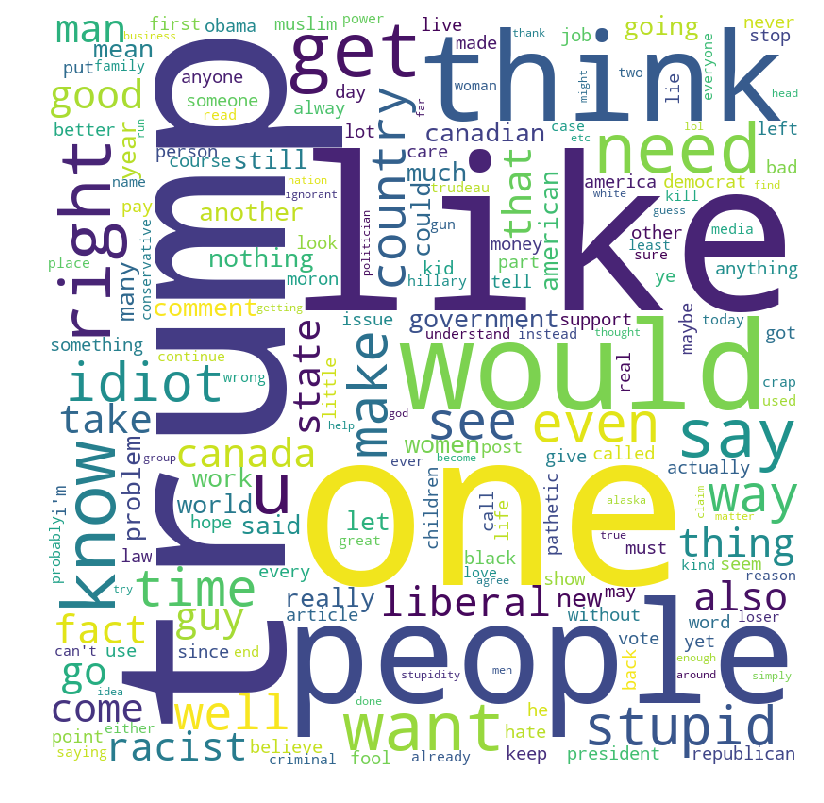

In [65]:
generate_wordcloud(data, target, 'severe_toxicity')

#### Obscene

In [66]:
target = pd.DataFrame(df['obscene'].copy())
temp = pd.DataFrame(np.where(target['obscene'] > 0.5, 1, 0))
temp[0].value_counts()

0    1797226
1       7648
Name: 0, dtype: int64

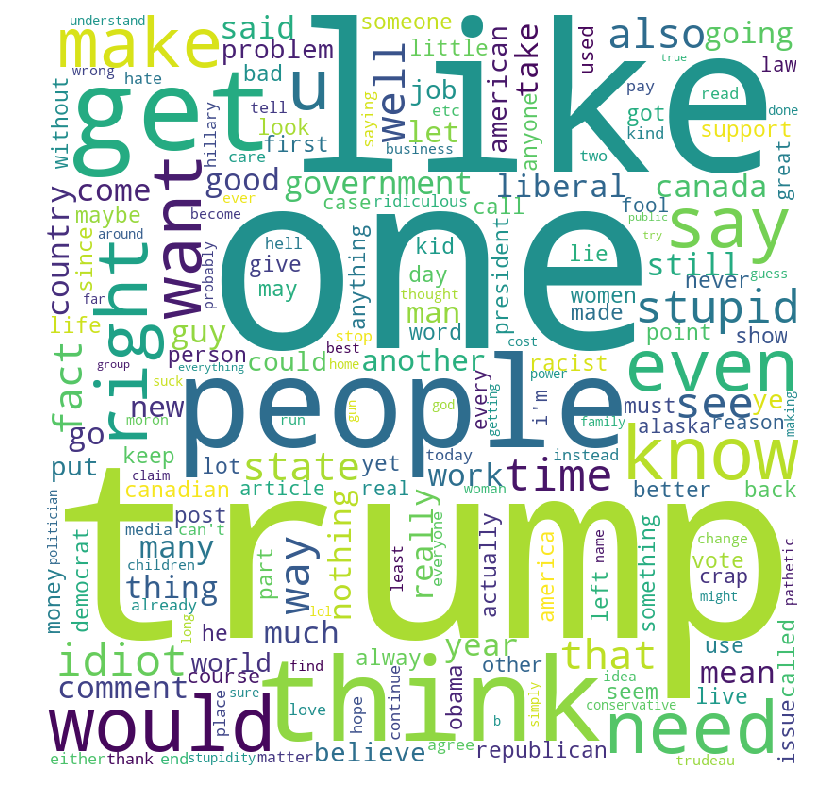

In [67]:
generate_wordcloud(data, target, 'obscene')

#### Identity Attack

In [68]:
target = pd.DataFrame(df['identity_attack'].copy())
temp = pd.DataFrame(np.where(target['identity_attack'] > 0.5, 1, 0))
temp[0].value_counts()

0    1797241
1       7633
Name: 0, dtype: int64

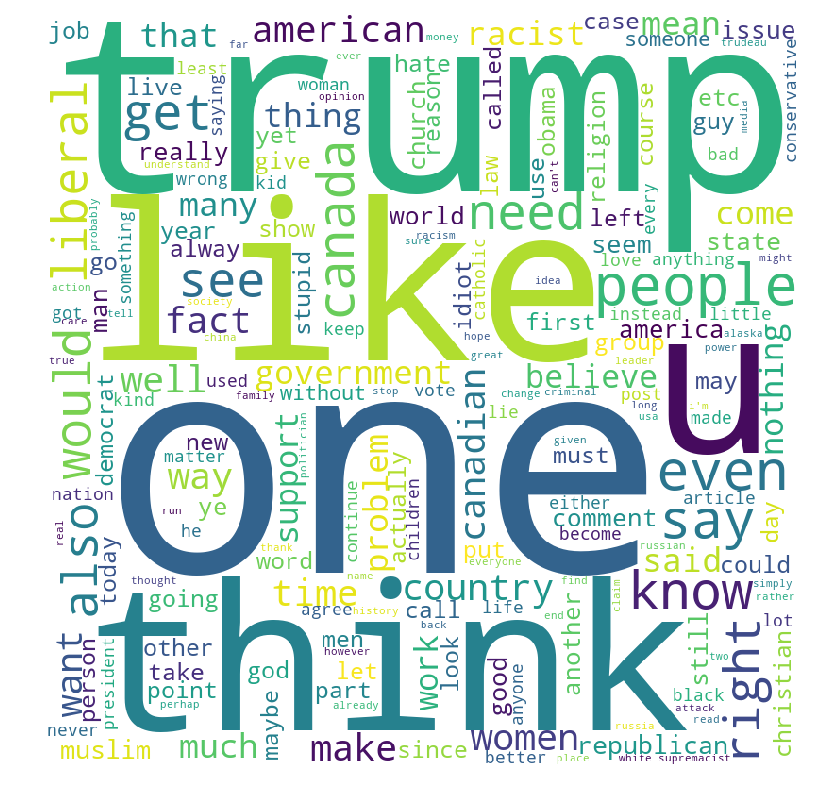

In [69]:
generate_wordcloud(data, target, 'identity_attack')

#### Insult

In [70]:
target = pd.DataFrame(df['insult'].copy())
temp = pd.DataFrame(np.where(target['insult'] > 0.5, 1, 0))
temp[0].value_counts()

0    1724987
1      79887
Name: 0, dtype: int64

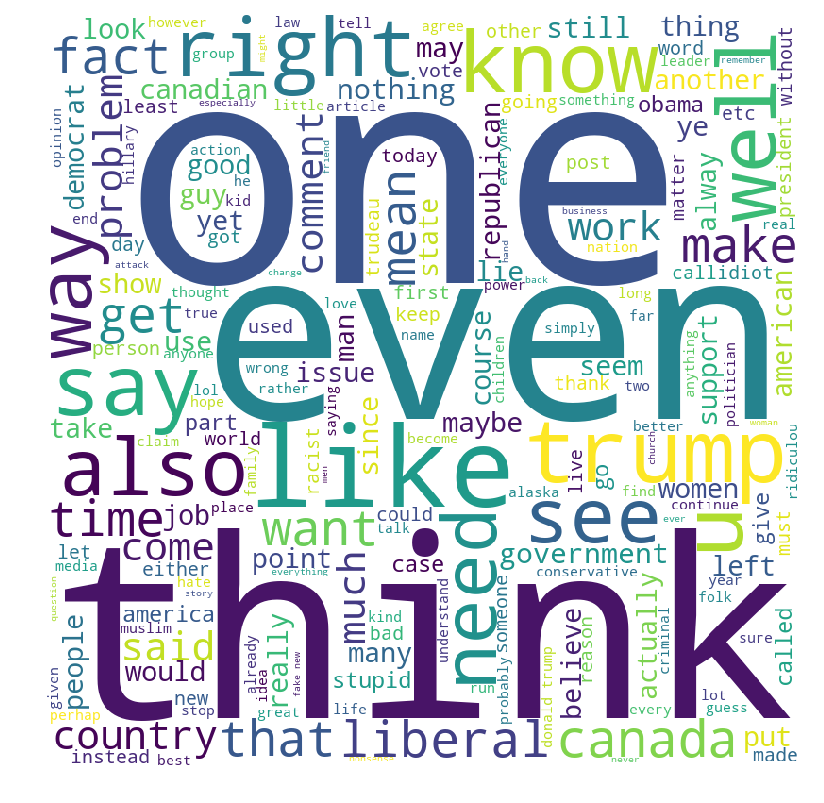

In [71]:
generate_wordcloud(data, target, 'insult')

#### Threat

In [72]:
target = pd.DataFrame(df['threat'].copy())
temp = pd.DataFrame(np.where(target['threat'] > 0.5, 1, 0))
temp[0].value_counts()

0    1802081
1       2793
Name: 0, dtype: int64

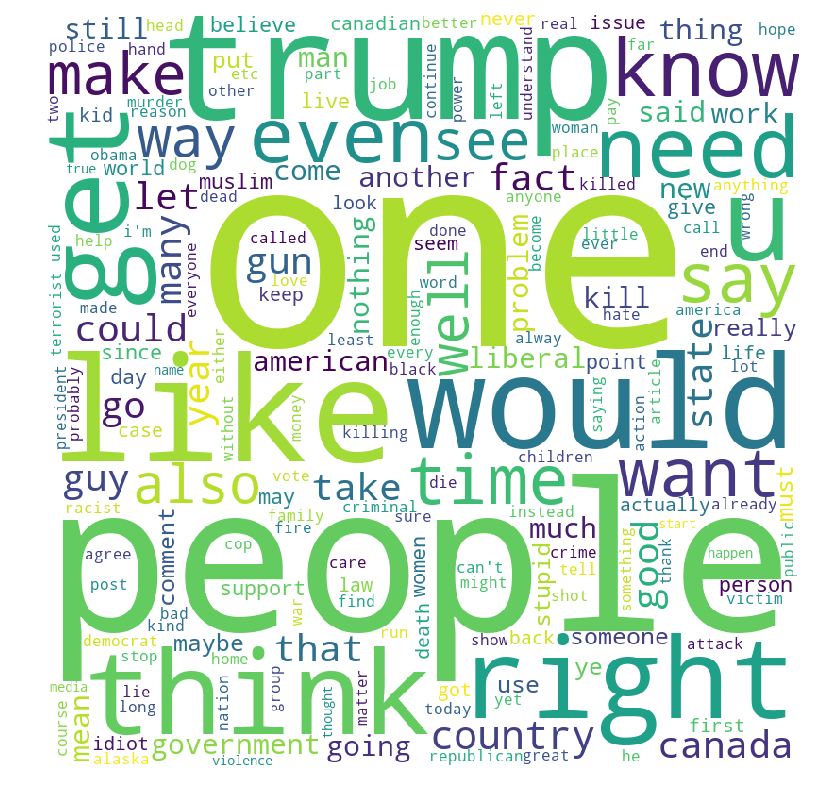

In [74]:
generate_wordcloud(data, target, 'threat')

# Topic Modelling - LDA

In [11]:
target = pd.DataFrame(np.where(df['target'] > 0.5, 1, 0))
target[0].value_counts()

0    1698436
1     106438
Name: 0, dtype: int64

In [12]:
stopwords = nltk.corpus.stopwords.words('english')
punctuation = '["#$%&\'()+,-./:;<=>@[\\]^_`{|}~]'
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

In [13]:
def clean_text(comment):
    comment = re.sub(punctuation, '', comment)
    comment = ' '.join([wn.lemmatize(token) for token in word_tokenize(comment.lower()) if token not in stopwords])
    return comment

In [15]:
features = []
for i,row in enumerate(data):
    features += [clean_text(row)]
    
    if i % 100000 == 0: print(i)
        
features = np.array(features)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000


In [16]:
model = TfidfVectorizer(sublinear_tf=True, min_df=5).fit(features)
tfidf_features = model.transform(features)

In [17]:
lda = LatentDirichletAllocation().fit(tfidf_features)

In [18]:
topics = lda.transform(tfidf_features)

In [85]:
words = []
for i in range(10):
    x = lda.components_[i]
    x = x.argsort()[-10:]
    words += [[model.get_feature_names()[j] for j in x]]
    print(i)

0
1
2
3
4
5
6
7
8
9


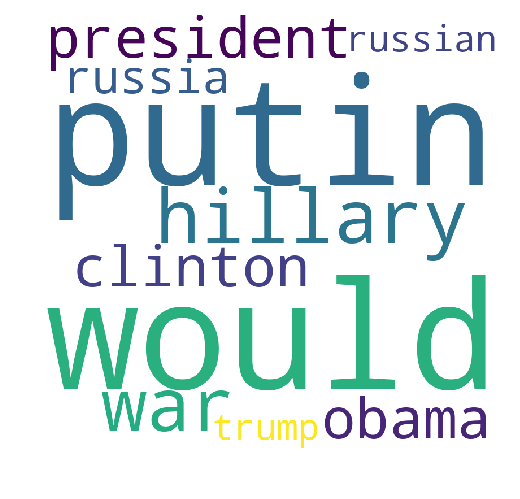

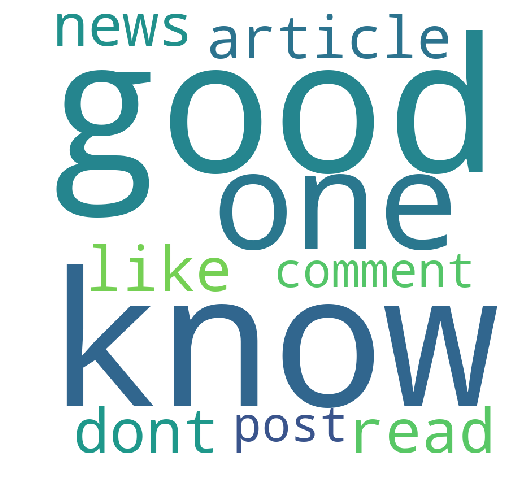

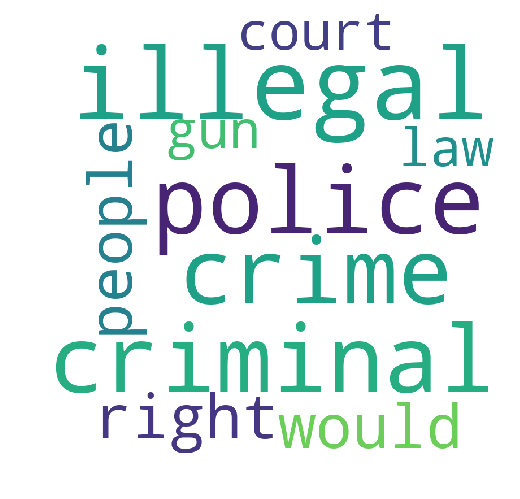

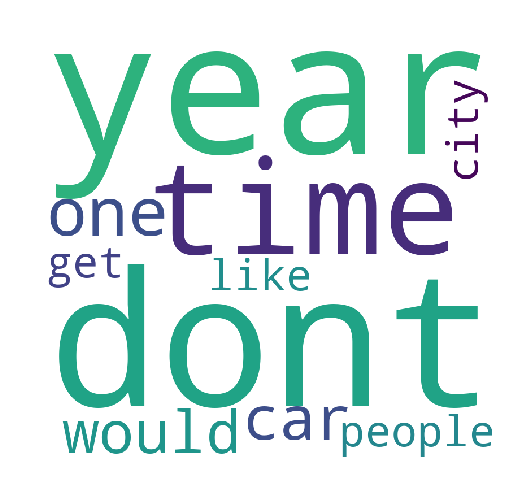

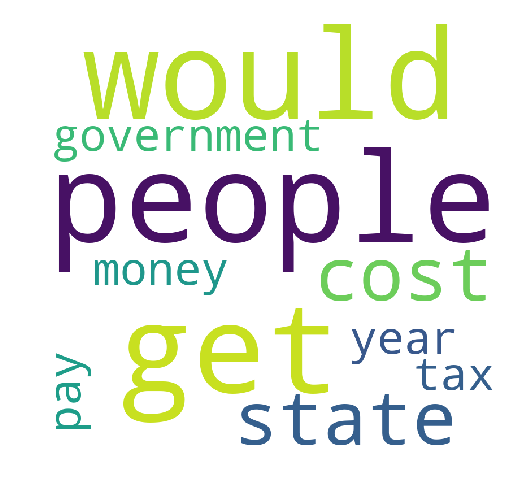

In [87]:
for i in range(5):
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white',  stopwords = stopwords, 
                    min_font_size = 10).generate(' '.join(words[i])) 
    # plot the WordCloud image                        
    plt.figure(facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.savefig('topic{}.jpg'.format(i))
    plt.show() 

# Label Distribution

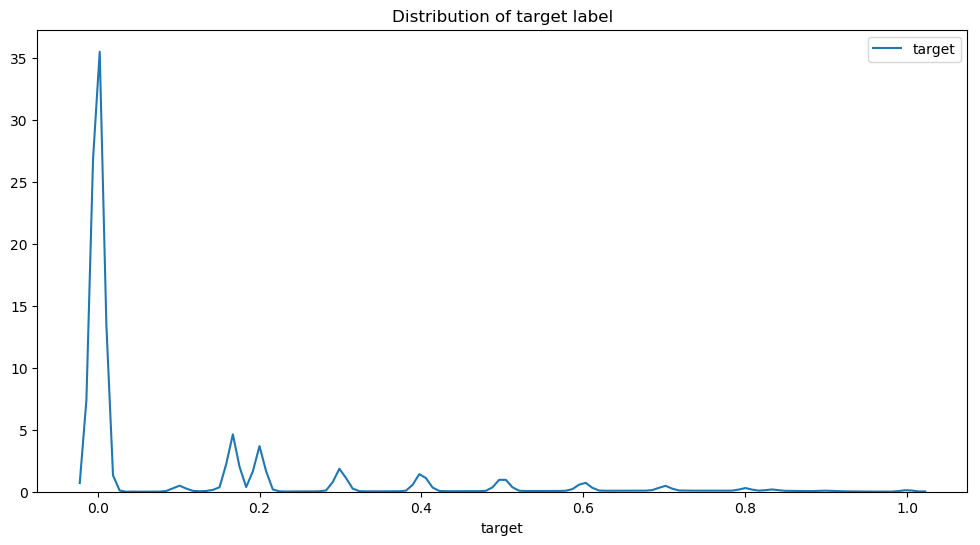

In [59]:
plt.figure(figsize=(12,6))
plt.title("Distribution of target label")
sns.distplot(df['target'],kde=True,hist=False, bins=120, label='target')
plt.savefig('target_dist.jpg')

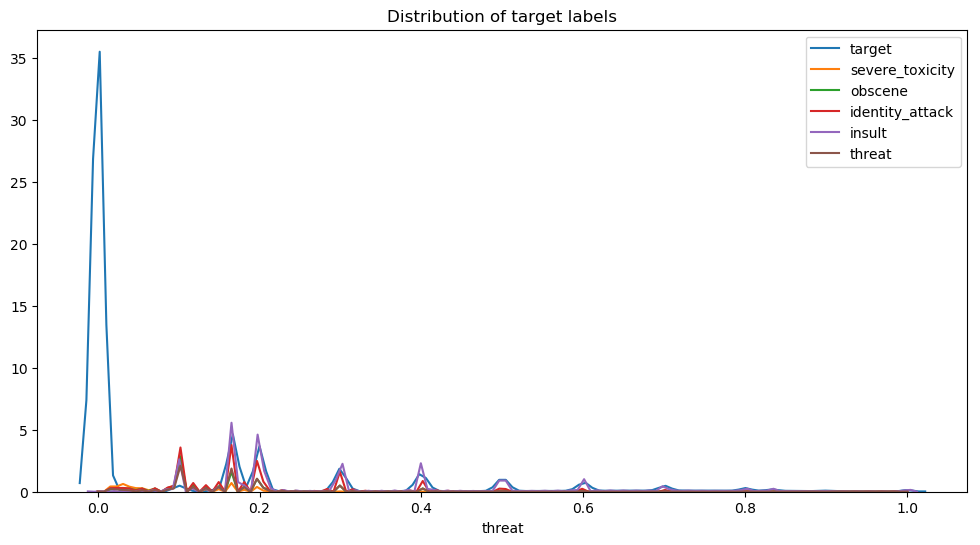

In [61]:
plt.figure(figsize=(12,6))
plt.title("Distribution of target labels")

for var in ['target','severe_toxicity', 'obscene','identity_attack', 'insult', 'threat']:
    sns.distplot(df[var],kde=True,hist=False, bins=120, label=var)

plt.savefig('labels_dist.jpg')
plt.legend(); plt.show()

# Text

In [96]:
stopwords = nltk.corpus.stopwords.words('english')
punctuation = '["#$%&\'()+,-./:;<=>@[\\]^_`{|}~]'
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

In [ ]:
comment = re.sub(punctuation, '', comment)
comment = ' '.join([wn.lemmatize(token) for token in word_tokenize(comment.lower()) if token not in stopwords])

In [173]:
df.loc[0:10, 'comment_text']

0     This is so cool. It's like, 'would you want yo...
1     Thank you!! This would make my life a lot less...
2     This is such an urgent design problem; kudos t...
3     Is this something I'll be able to install on m...
4                  haha you guys are a bunch of losers.
5                                  ur a sh*tty comment.
6                           hahahahahahahahhha suck it.
7                                   FFFFUUUUUUUUUUUUUUU
8     The ranchers seem motivated by mostly by greed...
9     It was a great show. Not a combo I'd of expect...
10                              Wow, that sounds great.
Name: comment_text, dtype: object

In [214]:
x = data[4]

In [215]:
x

'haha you guys are a bunch of losers.'

In [216]:
re.sub(punctuation, '', x)

'haha you guys are a bunch of losers'

In [217]:
re.sub(punctuation, '', x).lower()

'haha you guys are a bunch of losers'

In [218]:
print(word_tokenize(re.sub(punctuation, '', x).lower()))

['haha', 'you', 'guys', 'are', 'a', 'bunch', 'of', 'losers']


In [219]:
print([ps.stem(token) for token in word_tokenize(re.sub(punctuation, '', x).lower())])

['haha', 'you', 'guy', 'are', 'a', 'bunch', 'of', 'loser']


In [220]:
print([ps.stem(token) for token in word_tokenize(re.sub(punctuation, '', x).lower()) if token not in stopwords])

['haha', 'guy', 'bunch', 'loser']


In [221]:
roc_down = (0.796494504891289+ 0.7848266919218977+0.7771356494568605 +0.8192860282915785 +0.8093235842662436)/5
roc_up = (0.8259386140300253+0.7973379417256474+0.834766646266594 +0.864108197362257 +0.8637809008749082)/5
roc_no = (0.8063425776425333+ 0.814024710605366+0.7800406083086369 +0.8744042827043362 +0.8404680921110089)/5

roc_down, roc_up, roc_no

(0.7974132917655739, 0.8371864600518866, 0.8230560542743761)

In [222]:
acc_down = (0.7945802495967788+0.7808663703964448+0.773636958758066 +0.8140818753184984 +0.8064269501851631)/5
acc_up = (0.8253570758783286+0.794276975713434+0.8344204317572124 +0.8622730288954575+0.8634325154095892)/5
acc_no = (0.9015416580095574+0.8365260752129648 +0.9438354456679825 +0.9423062538956991 +0.9518997160468177)/5

acc_down, acc_up, acc_no 

(0.7939184808509903, 0.8359520055308044, 0.9152218297666043)

In [223]:
f1_down1 = (0.80267669+0.79319402 +0.78557824+0.82554155 +0.81557023)/5
f1_down2 = (0.78579097+0.76697587 +0.7602872 +0.80101085+0.79632981)/5

f1_up1 = (0.8291037+0.80409794+0.83708161+0.86688861 +0.8655391)/5
f1_up2 = (0.8214425+0.78341935 + 0.83167087+0.85732587 +0.86125887)/5

f1_no1 = (0.9458869+ 0.89694341+0.97081433 +0.96926841 +0.97493356)/5
f1_no2 = (0.45454964+ 0.60489314+0.25719938 +0.52963231 +0.40681904)/5

(f1_down1, f1_down2),(f1_up1, f1_up2),(f1_no1, f1_no2), 

((0.8045121460000001, 0.78207894),
 (0.840542192, 0.8310234919999999),
 (0.9515693220000001, 0.450618702))

In [224]:
re_down1 = (0.77290137+0.75141371 +0.7458682 +0.77903794 +0.77971708)/5
re_down2 = (0.82008764+0.81823968 +0.8084031 +0.85953412 +0.83893008)/5

re_up1 = (0.81239574+ 0.76700603+ 0.82407355+0.83801317 +0.85258039)/5
re_up2 = (0.83948149+0.82766985+ 0.84545975+0.89020323 +0.87498141)/5

re_no1 = (0.91421331+ 0.8471387+0.94922149 +0.94830334 +0.95722159)/5
re_no2 = (0.69847184+0.78091073 +0.61085973 +0.80050522 +0.7237146)/5

(re_down1, re_down2),(re_up1, re_up2),(re_no1, re_no2), 

((0.76578766, 0.829038924),
 (0.818813776, 0.855559146),
 (0.9232196859999998, 0.722892424))

In [225]:
prec_down1 = (0.83483806+0.83989403+ 0.82975439+0.87794955 +0.8548795)/5
prec_down2 = (0.75424777+0.72175684 + 0.71757723+0.74994893 +0.75784689)/5

prec_up1 = (0.84651333+0.84495963 +0.85050694 +0.89782498+0.87889782)/5
prec_up2 = (0.80416245+0.74366034 +0.81832455+0.82679049+0.84796011)/5

prec_no1 = (0.97983395+0.95297012 +0.99341243+0.99118142 +0.99331335)/5
prec_no2 = (0.33689742+0.49362897 +0.16289215+0.39572716 +0.282931)/5

(prec_down1, prec_down2),(prec_up1, prec_up2),(prec_no1, prec_no2), 

((0.847463106, 0.740275532),
 (0.86374054, 0.8081795880000001),
 (0.982142254, 0.33441534))

In [226]:
tfidf_features.shape

(1804874, 90621)